## Run this jupiter notebook to verify the functionality of the point cloud generator function and to  convert SimJEB data into the format needed to train our neural netowrks and store in a new folder.

## Folder output:  Array --> [Num_points,11]
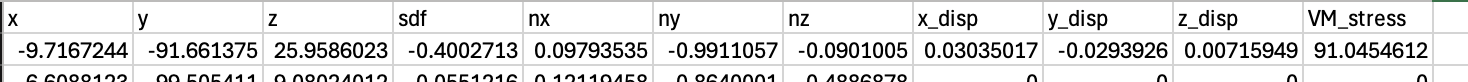




In [1]:
import os
import sys
import numpy as np  
import trimesh      
import pandas as pd

# To allow me to import the functiosn from other folders from the parent directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Functions.Dataset_generation_functions.Point_cloud_dataset import generate_point_cloud_dataset

from File_Paths.file_paths import mesh_path,FEM_path, point_cloud_path, data_path

## Test on a single file to verify the functionality of the function


In [2]:
# Define the 
test_load_case = 'torsional'
test_num_points = 800000
test_mesh_input_folder = os.path.join(data_path, 'SimJEB Sample - Single Part') 
test_FEM_input_folder = os.path.join(data_path, 'SimJEB Sample - Single Part')
test_output_folder = os.path.join(data_path, 'SimJEB Sample - Single Part')  

In [ ]:
generate_point_cloud_dataset(test_num_points, test_load_case, test_FEM_input_folder, test_mesh_input_folder, test_output_folder)

In [ ]:
# import the generated dataset
test_sample_path = os.path.join(data_path, 'SimJEB Sample - Single Part', '148_PC_data.csv')
test_sample = pd.read_csv(test_sample_path)

print("The generated dataset is:")
print("--------------------------------------------------------------------------------------------------------------------------")
print(test_sample.head().to_string())
print("--------------------------------------------------------------------------------------------------------------------------")

In [ ]:
from Functions.Plotting_functions.point_FEM_plot import plot_fem_data

# Plot the first sample
test_sample = test_sample.to_numpy()

# Load the FEM data
file_path_FEM_original = os.path.join(data_path, 'SimJEB Sample - Single Part', '148_FEM_data.csv')
FEM_original = pd.read_csv(file_path_FEM_original)
FEM_original = FEM_original.to_numpy()

point_cloud_points = test_sample[:, 0:3]
point_cloud_sdf = test_sample[:, 3]
point_cloud_normals = test_sample[:, 4:7]
point_cloud_FEM = test_sample[:, 7:11]

load_case = test_load_case

# Plot the FEM data on the grid points
plot_quantity = 'stress'  # Choose 'displacement' or 'stress'
fig = plot_fem_data(FEM_original, 
                    point_cloud_points,
                    point_cloud_sdf,
                    point_cloud_FEM, 
                    plot_quantity ,
                    load_case)
fig.show()

In [ ]:
print("Point cloud statistics:")
print("-------------------------------------------------------------------------------")
num_points_outside_surface = np.sum(point_cloud_sdf > 0)
print(f"Number of points outside the surface: {num_points_outside_surface}")
num_points_inside_surface = np.sum(point_cloud_sdf <= 0)
print(f"Number of points inside the surface: {num_points_inside_surface}")
percentage_points_outside_surface = (num_points_outside_surface / test_num_points) * 100
print(f"Percentage of points outside the surface: {percentage_points_outside_surface:.2f}%")
percentage_points_inside_surface = (num_points_inside_surface / test_num_points) * 100
print(f"Percentage of points inside the surface: {percentage_points_inside_surface:.2f}%")
print("-------------------------------------------------------------------------------")

In [ ]:
from Functions.Surface_reconstruction_functions.marching_cubes import marching_cubes_point_cloud
grid_res = 500
mesh = marching_cubes_point_cloud(test_sample, grid_res)
mesh.show()

## Generate the full dataset:

In [ ]:
mesh_input_folder = os.path.join(data_path, 'SimJEB Sample - Single Part', 'SimJEB_surfmesh_(obj)') 
FEM_input_folder = os.path.join(data_path, 'SimJEB Sample - Single Part', 'SimJEB _FEM_Results')
output_folder = os.path.join(data_path, 'SimJEB Sample - Single Part', 'Point_Cloud_Dataset') 


load_case = 'vertical'
num_points = 800000

generate_point_cloud_dataset(num_points,load_case, FEM_input_folder,mesh_input_folder,output_folder)

Generate for part 411

In [8]:
part_folder = os.path.join(data_path, "411")
output_folder = os.path.join(data_path, "Point_Cloud_Dataset") 
FEM_input_folder = os.path.join(data_path, 'SimJEB Sample - Single Part', 'SimJEB _FEM_Results')
load_case = 'vertical'
num_points = 800000
generate_point_cloud_dataset(num_points, load_case, FEM_input_folder, part_folder, output_folder)

Skipping 1 already-processed meshes; processing 0 new meshes.
All meshes processed successfully.
